In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# For Clustering Analysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Encode Country and Item using OneHotEncoder

merged_data = pd.read_csv('/content/Final_merged_data.csv')

merged_data_onehot = pd.get_dummies(merged_data, columns = ['Item'], prefix = ['Item'])
merged_data = merged_data_onehot.loc[:, merged_data_onehot.columns != 'Yield (hg/ha)']
merged_data ['Yield (hg/ha)'] = merged_data_onehot['Yield (hg/ha)']
merged_data

,Year,Country,Rainfall (mm),Temperature (Celcius),Pesticides (Tons),"Item_Abaca, manila hemp, raw",Item_Areca nuts,Item_Avocados,Item_Bananas,"Item_Beans, dry",...,Item_Soya beans,Item_Spinach,Item_Sugar cane,Item_Sweet potatoes,Item_Tea leaves,Item_Tomatoes,Item_Unmanufactured tobacco,"Item_Vanilla, raw",Item_Watermelons,Yield (hg/ha)
0,2010,Indonesia,190.783333,26.6,313639.25,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8275
1,2010,Indonesia,190.783333,26.6,313639.25,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,12623
2,2010,Indonesia,190.783333,26.6,313639.25,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,109367
3,2010,Indonesia,190.783333,26.6,313639.25,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,568256
4,2010,Indonesia,190.783333,26.6,313639.25,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,11300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2021,Indonesia,199.550000,26.8,283297.13,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,50244
716,2021,Indonesia,199.550000,26.8,283297.13,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,187605
717,2021,Indonesia,199.550000,26.8,283297.13,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,11544
718,2021,Indonesia,199.550000,26.8,283297.13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1528


In [3]:
merged_data.shape

(720, 66)

In [4]:
merged_data = merged_data.drop(['Year', 'Country'], axis = 1)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 64 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Rainfall (mm)                                                                   720 non-null    float64
 1   Temperature (Celcius)                                                           720 non-null    float64
 2   Pesticides (Tons)                                                               720 non-null    float64
 3   Item_Abaca, manila hemp, raw                                                    720 non-null    uint8  
 4   Item_Areca nuts                                                                 720 non-null    uint8  
 5   Item_Avocados                                                                   720 non-null    uint8  
 6   Item_Bananas      

In [5]:
merged_data.head()

,Rainfall (mm),Temperature (Celcius),Pesticides (Tons),"Item_Abaca, manila hemp, raw",Item_Areca nuts,Item_Avocados,Item_Bananas,"Item_Beans, dry",Item_Cabbages,Item_Cantaloupes and other melons,...,Item_Soya beans,Item_Spinach,Item_Sugar cane,Item_Sweet potatoes,Item_Tea leaves,Item_Tomatoes,Item_Unmanufactured tobacco,"Item_Vanilla, raw",Item_Watermelons,Yield (hg/ha)
0,190.783333,26.6,313639.25,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8275
1,190.783333,26.6,313639.25,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12623
2,190.783333,26.6,313639.25,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,109367
3,190.783333,26.6,313639.25,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,568256
4,190.783333,26.6,313639.25,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,11300


In [6]:
merged_data.tail()

,Rainfall (mm),Temperature (Celcius),Pesticides (Tons),"Item_Abaca, manila hemp, raw",Item_Areca nuts,Item_Avocados,Item_Bananas,"Item_Beans, dry",Item_Cabbages,Item_Cantaloupes and other melons,...,Item_Soya beans,Item_Spinach,Item_Sugar cane,Item_Sweet potatoes,Item_Tea leaves,Item_Tomatoes,Item_Unmanufactured tobacco,"Item_Vanilla, raw",Item_Watermelons,Yield (hg/ha)
715,199.55,26.8,283297.13,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,50244
716,199.55,26.8,283297.13,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,187605
717,199.55,26.8,283297.13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,11544
718,199.55,26.8,283297.13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1528
719,199.55,26.8,283297.13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,138295


In [7]:
# Scaling Features

y = merged_data['Yield (hg/ha)']
x = merged_data.drop(['Yield (hg/ha)'], axis=1)

scaler = MinMaxScaler()
data_no_yield = pd.DataFrame(scaler.fit_transform(x), index = y.index)
data_no_yield.columns = x.columns
data_no_yield.insert(len(data_no_yield.columns), 'Yield (hg/ha)', y)

merged_data = data_no_yield
merged_data

,Rainfall (mm),Temperature (Celcius),Pesticides (Tons),"Item_Abaca, manila hemp, raw",Item_Areca nuts,Item_Avocados,Item_Bananas,"Item_Beans, dry",Item_Cabbages,Item_Cantaloupes and other melons,...,Item_Soya beans,Item_Spinach,Item_Sugar cane,Item_Sweet potatoes,Item_Tea leaves,Item_Tomatoes,Item_Unmanufactured tobacco,"Item_Vanilla, raw",Item_Watermelons,Yield (hg/ha)
0,0.669914,0.166667,0.748439,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8275
1,0.669914,0.166667,0.748439,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12623
2,0.669914,0.166667,0.748439,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109367
3,0.669914,0.166667,0.748439,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568256
4,0.669914,0.166667,0.748439,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.733971,0.500000,0.537343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50244
716,0.733971,0.500000,0.537343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,187605
717,0.733971,0.500000,0.537343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11544
718,0.733971,0.500000,0.537343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1528


In [8]:
# splitting the data into training and testing (80/20)

# excluding Yield (hg/ha) values as it is what the ML model should be predicting
y = merged_data['Yield (hg/ha)']
x = merged_data.drop(['Yield (hg/ha)'], axis=1)

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("The shape of x train:", x_train.shape)
print("The shape of x test:", x_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)

The shape of x train: (576, 63)
The shape of x test: (144, 63)
The shape of y train: (576,)
The shape of y test: (144,)


In [9]:
# train the random forest model

start_train_time = time.time()
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
end_train_time = time.time()

# make predictions

start_pred_time = time.time()
y_pred = linear_reg.predict(x_test)
end_pred_time = time.time()

# find time taken

time_train_taken = end_train_time - start_train_time
time_pred_taken = end_pred_time - start_pred_time

In [10]:
# evaluation metrics

r2 = r2_score(y_test, y_pred) # R^2
mae = mean_absolute_error(y_test, y_pred) # mean absolute error
mse = mean_squared_error(y_test, y_pred) # mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False) # root mean squared error
max_err = max_error(y_test, y_pred) # max error
mape = mean_absolute_percentage_error(y_test, y_pred) # mean absolute percentage error

metrics_legend = f'R^2 = {r2}\n MAE = {mae}\n MSE = {mse}\n RMSE = {rmse}\n MAX = {max_err}\n MAPE = {mape}'

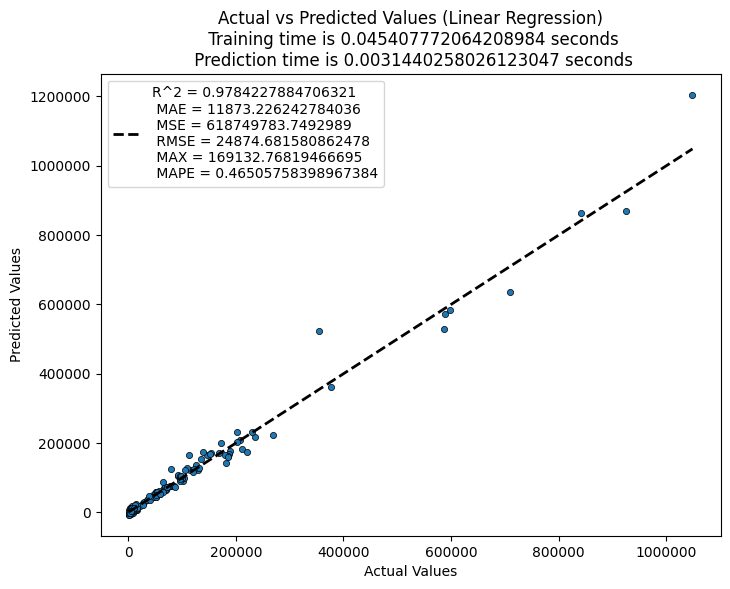

In [11]:
# plot the actual vs predicted values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, s = 20, edgecolors = 'black', linewidth = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2, label = metrics_legend)

plt.title('Actual vs Predicted Values (Linear Regression)\n Training time is ' + str(time_train_taken) + ' seconds\n Prediction time is ' + str(time_pred_taken) + ' seconds')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.ticklabel_format(style='plain', axis='both')
plt.legend()
plt.show()